In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from keras.preprocessing.image import img_to_array, load_img

def readResizeSave(newFileDirectory, dataFileDirectory, name):
    index = 0
    if not os.path.isdir(newFileDirectory):
        os.mkdir(newFileDirectory)
    
    for filename in os.listdir(dataFileDirectory):
        filePath = dataFileDirectory + filename
        if os.path.isfile(filePath):
            image = cv2.imread(filePath)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, [150, 150])
            newFilePath = newFileDirectory + name + str(index).zfill(6) + ".jpg"
            plt.imsave(newFilePath, image)
            index = index + 1
            
def load_images(dataset_dir):
    images = []
    for filename in os.listdir(dataset_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter image files

            img = load_img(os.path.join(dataset_dir, filename), target_size=(300, 300), color_mode='rgb')
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
    return np.array(images)

In [2]:
imagesFileLocation = "./data_sources/images/"

rawCatImages = imagesFileLocation + "cats/"
rawDogImages = imagesFileLocation + "dogs/"

processedCatImages = imagesFileLocation + "processed_cats/"
processedDogImages = imagesFileLocation + "processed_dogs/"

In [5]:
readResizeSave(processedDogImages, rawDogImages, "dog")

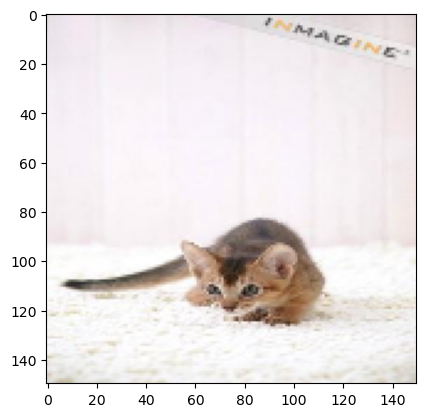

In [3]:
image = cv2.imread(rawCatImages + "Abyssinian_127_jpg.rf.b2553880d73a78e26e396fe7775f31be.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, [150, 150])
plt.imshow(image)

In [13]:
filenames = os.listdir(processedDogImages)

DogImagesDF = pd.DataFrame(filenames)
# DogImagesDF.to_csv("./data_sources/dog_data.csv")


In [57]:
dogData = pd.read_csv("data_sources/dog_data.csv")
dogData

,index,fileDirectory,label
0,0,dog000000.jpg,middle-aged
1,1,dog000001.jpg,middle-aged
2,2,dog000002.jpg,middle-aged
3,3,dog000003.jpg,old
4,4,dog000004.jpg,middle-aged
...,...,...,...
5570,5570,dog005570.jpg,young
5571,5571,dog005571.jpg,middle-aged
5572,5572,dog005572.jpg,middle-aged
5573,5573,dog005573.jpg,young


In [60]:
rgbData = load_images("data_sources/images/processed_dogs/")
rgbData.shape

(5575, 300, 300, 3)

In [83]:
r_data = []
g_data = []
b_data = []

for image in rgbData:
    rImage = image[:,:,0]
    gImage = image[:,:,1]
    bImage = image[:,:,2]
    
    r_data.append(np.array(rImage).flatten())
    g_data.append(np.array(gImage).flatten())
    b_data.append(np.array(bImage).flatten())
    
dogData_RGB["RGB_DATA"]

0       [[[0.39215687, 0.34509805, 0.3529412], [0.4039...
1       [[[0.25490198, 0.35686275, 0.44705883], [0.274...
2       [[[0.3372549, 0.050980393, 0.11764706], [0.345...
3       [[[1.0, 0.99607843, 1.0], [0.93333334, 0.92549...
4       [[[0.019607844, 0.015686275, 0.007843138], [0....
                              ...                        
5570    [[[0.39607844, 0.40392157, 0.4], [0.39607844, ...
5571    [[[0.019607844, 0.019607844, 0.019607844], [0....
5572    [[[0.5294118, 0.39607844, 0.21568628], [0.4862...
5573    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
5574    [[[0.15294118, 0.11372549, 0.07450981], [0.156...
Name: RGB_DATA, Length: 5575, dtype: object

In [86]:
dogData_RGB["R_DATA"] = r_data
dogData_RGB["G_DATA"] = g_data
dogData_RGB["B_DATA"] = b_data

dogData_RGB

,index,fileDirectory,label,RGB_DATA,R_DATA,G_DATA,B_DATA
0,0,dog000000.jpg,middle-aged,"[[[0.39215687, 0.34509805, 0.3529412], [0.4039...","[0.39215687, 0.40392157, 0.40784314, 0.4588235...","[0.34509805, 0.35686275, 0.36078432, 0.4, 0.30...","[0.3529412, 0.3647059, 0.36862746, 0.4117647, ..."
1,1,dog000001.jpg,middle-aged,"[[[0.25490198, 0.35686275, 0.44705883], [0.274...","[0.25490198, 0.27450982, 0.3019608, 0.31764707...","[0.35686275, 0.3764706, 0.40392157, 0.41960785...","[0.44705883, 0.46666667, 0.49411765, 0.5098039..."
2,2,dog000002.jpg,middle-aged,"[[[0.3372549, 0.050980393, 0.11764706], [0.345...","[0.3372549, 0.34509805, 0.34509805, 0.34509805...","[0.050980393, 0.05882353, 0.06666667, 0.066666...","[0.11764706, 0.1254902, 0.12941177, 0.12941177..."
3,3,dog000003.jpg,old,"[[[1.0, 0.99607843, 1.0], [0.93333334, 0.92549...","[1.0, 0.93333334, 0.9882353, 1.0, 0.9764706, 0...","[0.99607843, 0.9254902, 0.98039216, 1.0, 0.984...","[1.0, 0.92941177, 0.9843137, 1.0, 0.98039216, ..."
4,4,dog000004.jpg,middle-aged,"[[[0.019607844, 0.015686275, 0.007843138], [0....","[0.019607844, 0.019607844, 0.019607844, 0.0196...","[0.015686275, 0.015686275, 0.015686275, 0.0156...","[0.007843138, 0.007843138, 0.007843138, 0.0078..."
...,...,...,...,...,...,...,...
5570,5570,dog005570.jpg,young,"[[[0.39607844, 0.40392157, 0.4], [0.39607844, ...","[0.39607844, 0.39607844, 0.39607844, 0.4, 0.4,...","[0.40392157, 0.40392157, 0.40392157, 0.4078431...","[0.4, 0.4, 0.4, 0.40392157, 0.40392157, 0.4078..."
5571,5571,dog005571.jpg,middle-aged,"[[[0.019607844, 0.019607844, 0.019607844], [0....","[0.019607844, 0.019607844, 0.019607844, 0.0196...","[0.019607844, 0.019607844, 0.019607844, 0.0196...","[0.019607844, 0.019607844, 0.019607844, 0.0196..."
5572,5572,dog005572.jpg,middle-aged,"[[[0.5294118, 0.39607844, 0.21568628], [0.4862...","[0.5294118, 0.4862745, 0.5529412, 0.5137255, 0...","[0.39607844, 0.29411766, 0.34509805, 0.3803921...","[0.21568628, 0.1254902, 0.18039216, 0.2, 0.172..."
5573,5573,dog005573.jpg,young,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...","[0.0, 0.0, 0.0, 0.003921569, 0.003921569, 0.00...","[0.0, 0.0, 0.0, 0.003921569, 0.003921569, 0.00...","[0.0, 0.0, 0.0, 0.003921569, 0.003921569, 0.00..."


In [87]:
dogData_RGB.to_csv("./data_sources/dogData_RGB.csv")

In [133]:
jsonData = {"r_data":r_data, "g_data":g_data, "b_data":b_data}

jsonObject = json.dumps(jsonData, indent=1)
with open("dogJsonData.json", "w") as outfile:
    outfile.write(jsonObject)

TypeError: Object of type ndarray is not JSON serializable

In [145]:
r_dataFixed = [np.tol]

<function ndarray.tolist>